In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow 
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import cv2
from scipy.spatial import distance
print("Hello")

Hello


In [2]:
mask_path = "./data_set/with_mask/"
no_mask_path = "./data_set/without_mask/"

image_mask = []
target_mask = []
for i in os.listdir(mask_path):
    pic = os.path.join(mask_path + "/", i)
    image_mask.append(pic)
    target_mask.append("mask")   

image_no_mask = []
target_no_mask = []
for i in os.listdir(no_mask_path):
    pic = os.path.join(no_mask_path + "/", i)
    image_no_mask.append(pic)
    target_no_mask.append("without_mask")

mask = pd.DataFrame()
mask["image"] = image_mask
mask["target"] = target_mask

no_mask = pd.DataFrame()
no_mask["image"] = image_no_mask
no_mask["target"] = target_no_mask

data = pd.concat([mask, no_mask], axis = 0, ignore_index = True)
data = shuffle(data)
data

,image,target
146,./data_set/with_mask//25-with-mask.jpg,mask
1045,./data_set/without_mask//47.jpg,without_mask
435,./data_set/with_mask//augmented_image_122.jpg,mask
880,./data_set/without_mask//299.jpg,without_mask
790,./data_set/without_mask//20.jpg,without_mask
...,...,...
942,./data_set/without_mask//365.jpg,without_mask
43,./data_set/with_mask//139-with-mask.jpg,mask
617,./data_set/with_mask//augmented_image_36.jpg,mask
1267,./data_set/without_mask//augmented_image_276.jpg,without_mask


c:\users\muhannad\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


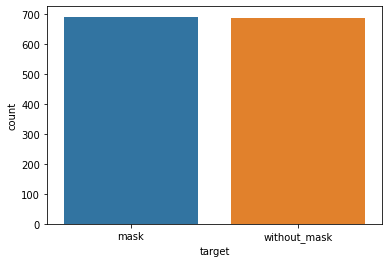

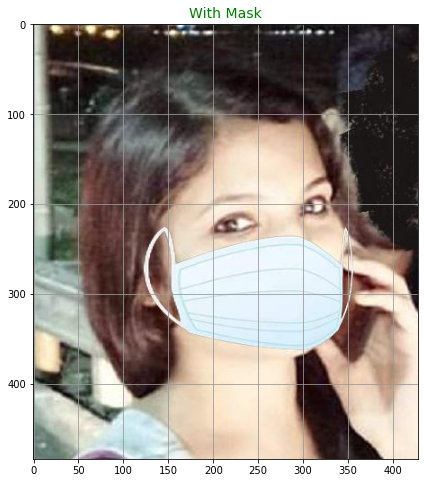

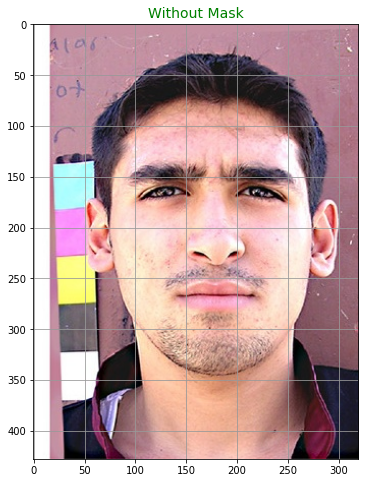

In [3]:
sns.countplot(data["target"])

plt.figure(figsize=(12,8))

img = load_img(mask["image"][8])
plt.imshow(img)
plt.title("With Mask", color = "green", size = 14)
plt.grid(color='#999999', linestyle='-')
plt.show()


plt.figure(figsize=(12,8))

img = load_img(no_mask["image"][100])
plt.imshow(img)
plt.title("Without Mask", color = "green", size = 14)
plt.grid(color='#999999', linestyle='-')
plt.show()

In [4]:
train = data.iloc[0:1100, ]
val = data.iloc[1101:1200, ]
test = data.iloc[1201:, ]
print("Train Seti:","\n",train["target"].value_counts(), "\n"
      "Test Seti: ", "\n",test["target"].value_counts(),
      "\n""Validation Seti: ","\n", val["target"].value_counts())

Train Seti: 
 mask            554
without_mask    546
Name: target, dtype: int64 
Test Seti:  
 without_mask    91
mask            84
Name: target, dtype: int64 
Validation Seti:  
 mask            50
without_mask    49
Name: target, dtype: int64


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_dataframe(dataframe = val,
                                                x_col = "image",
                                                y_col = "target",
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = "binary")


test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32)

Found 1100 validated image filenames belonging to 2 classes.
Found 99 validated image filenames belonging to 2 classes.
Found 175 validated image filenames belonging to 2 classes.


In [6]:
from tensorflow.keras import layers , models , optimizers
from tensorflow.keras.applications.vgg19 import VGG19 , preprocess_input

vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = models.Sequential()
model.add(vgg19)
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 8193      
Total params: 20,032,577
Trainable params: 8,193
Non-trainable params: 20,024,384
_________________________________________________________________


In [7]:
model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ["acc"])

c:\users\muhannad\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator)//32,
                    epochs=60,
                    validation_data=val_generator,
                    validation_steps=len(val_generator)//32)


# acc = history.history["acc"]
# val_acc = history.history["val_acc"]
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]

# epochs = range(1, len(acc) + 1)

# plt.figure(figsize = (15, 6))

# plt.plot(epochs, acc, "bo", label = "Epochs")
# plt.plot(epochs, val_acc, "b", label = "Test Accuracy")
# plt.title("Epochs vs test accuracy")
# plt.legend()

# plt.figure(figsize = (15, 6))

# plt.plot(epochs, loss, "bo", label = "Train Loss")
# plt.plot(epochs, val_loss, "b", label = "Val loss")
# plt.legend()

# plt.show()

test_loss, test_acc = model.evaluate(test_generator, steps = 9)
print("Test ACC: ", round(test_acc, 2))

Epoch 1/60
1/1 [==============================] - 14s 14s/step - loss: 0.7557 - acc: 0.4062
Epoch 2/60
1/1 [==============================] - 10s 10s/step - loss: 0.7572 - acc: 0.4062
Epoch 3/60
1/1 [==============================] - 10s 10s/step - loss: 0.6660 - acc: 0.6562
Epoch 4/60
1/1 [==============================] - 11s 11s/step - loss: 0.7378 - acc: 0.3438
Epoch 5/60
1/1 [==============================] - 9s 9s/step - loss: 0.7300 - acc: 0.5000
Epoch 6/60
1/1 [==============================] - 10s 10s/step - loss: 0.7354 - acc: 0.3750
Epoch 7/60
1/1 [==============================] - 9s 9s/step - loss: 0.6858 - acc: 0.5000
Epoch 8/60
1/1 [==============================] - 9s 9s/step - loss: 0.7801 - acc: 0.3125
Epoch 9/60
1/1 [==============================] - 9s 9s/step - loss: 0.7301 - acc: 0.5000
Epoch 10/60
1/1 [==============================] - 9s 9s/step - loss: 0.6557 - acc: 0.6875
Epoch 11/60
1/1 [==============================] - 9s 9s/step - loss: 0.7682 - acc: 0.375

In [9]:
from tensorflow.keras.models import save_model, load_model

# Save the model
filepath = './saved_model'
save_model(model, filepath)

# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
    
# serializing weights to HDF5
# model.save_weights("model.h5")




INFO:tensorflow:Assets written to: ./saved_model\assets


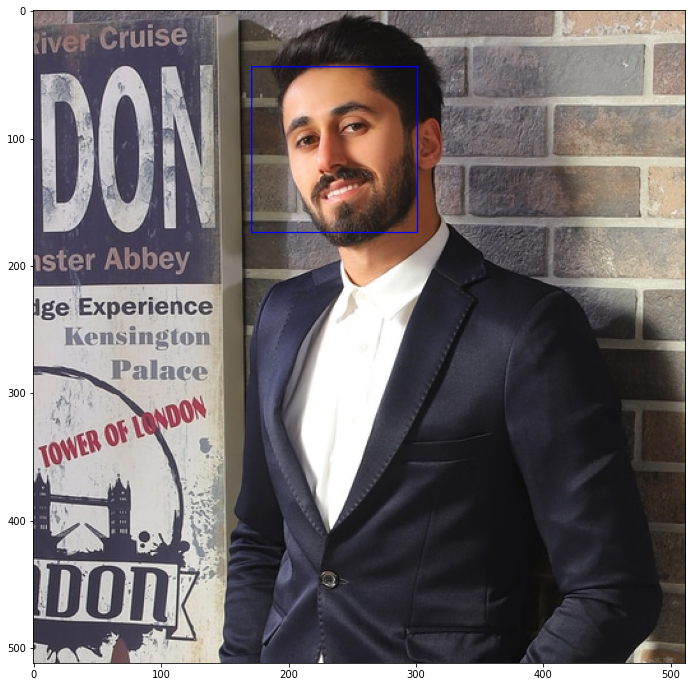

In [18]:
face_model = cv2.CascadeClassifier('data_set/convs/haarcascade_frontalface_default.xml')
img = cv2.imread('./assets/muhannad.jpg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)



[[0.75330603]]


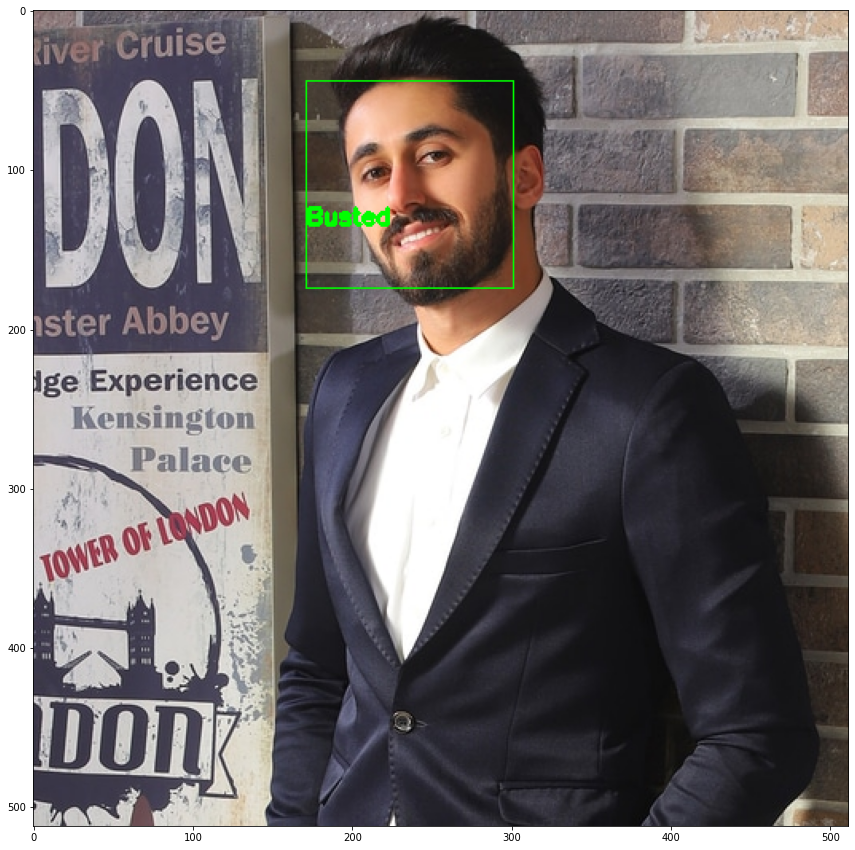

In [19]:
from tensorflow.keras.models import save_model, load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
# model.load_weights('model.h5') # important loading the saved weight model
# Load the whole model
model = load_model('./saved_model', compile = True)

sample_mask_img = cv2.imread('./assets/muhannad.jpg')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
model.predict(sample_mask_img)
mask_label = {0:'OK!',1:'Busted'}
dist_label = {0:(0,255,0),1:(255,0,0)}
MIN_DISTANCE = 0

if len(faces)>=1:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        print(mask_result)
        cv2.putText(new_img,mask_label[round(mask_result[0][0])],(x, y+90), cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(15,15))
    plt.imshow(new_img)
            
else:
    print("Y")